# Tutorial 2, Question 4: the linear neuron

In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
import matplotlib.ticker as ticker

In [2]:
no_epochs = 1000
lr = 0.05

SEED = 10
np.random.seed(SEED)

In [3]:
# generate data
no_data = 25
X = np.random.rand(no_data,3)
X[:, 2] = X[:,0]*X[:,1]
Y = 1.5+3.3*X[:,0]-2.5*X[:,1]+0.2*X[:,2]
Y = Y.reshape(no_data,1)

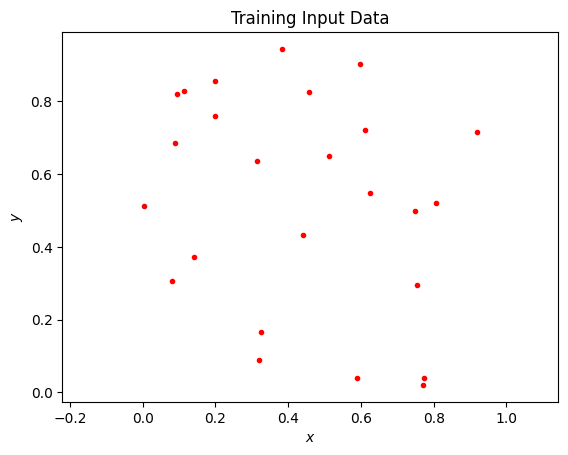

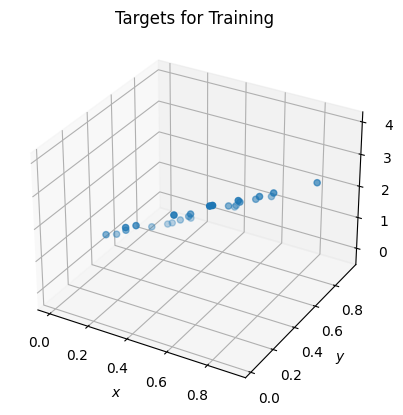

In [4]:
# plot data
plt.figure(1)
plt.plot(X[:,0], X[:,1], 'r.')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Training Input Data')
plt.axis('equal')
plt.show()

fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], 'b.')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.set_title('Targets for Training')
plt.show()

In [5]:
# class for a linear neuron
# a class for the preceptron
class Linear():
  def __init__(self):
    self.w = torch.tensor(np.random.rand(3,1), dtype=torch.double, requires_grad=True)
    self.b = torch.tensor(0., dtype=torch.double, requires_grad=True)

  def __call__(self, x):
    y = torch.matmul(torch.tensor(x), self.w) + self.b
    return y

In [6]:
# mean squared error as the loss function
def loss_fn(y_pred, d):
    return torch.mean(torch.square(y_pred - d))

In [7]:
# create a linear neuron
model = Linear()
print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))

w: [[0.04309736]
 [0.87991517]
 [0.76324059]], b: 0.0


In [8]:
# Collect the history of W-values and b-values to plot later
mse = []
idx = np.arange(no_data)
for epoch in range(no_epochs):
    
    np.random.shuffle(idx)
    XX, YY = X[idx], Y[idx]
    
    y_ = model(XX)
    
    loss_ = loss_fn(y_, torch.tensor(YY))
    
    loss_.backward()
    
    with torch.no_grad():
        model.w -= lr * model.w.grad
        model.b -= lr * model.b.grad
    
    model.w.grad = None
    model.b.grad = None

    mse.append(loss_.detach().numpy())
  
    if epoch%100 == 99:
        print('Epoch %4d:  mse=%2.5f'%(epoch+1, mse[epoch]))

Epoch  100:  mse=0.34371
Epoch  200:  mse=0.05265
Epoch  300:  mse=0.00858
Epoch  400:  mse=0.00157
Epoch  500:  mse=0.00035
Epoch  600:  mse=0.00012
Epoch  700:  mse=0.00006
Epoch  800:  mse=0.00005
Epoch  900:  mse=0.00004
Epoch 1000:  mse=0.00004


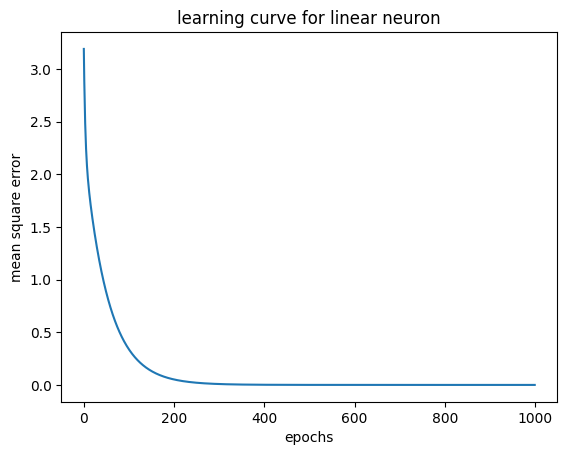

In [9]:
# plot learning curves
plt.figure(3)
plt.plot(range(no_epochs), mse)
plt.xlabel('epochs')
plt.ylabel('mean square error')
plt.title('learning curve for linear neuron')
plt.show()

In [10]:
print('w: {}, b: {}'.format(model.w.detach().numpy(), model.b.detach().numpy()))
print('mse: {}'.format(mse[-1]))

w: [[ 3.24902136]
 [-2.54615674]
 [ 0.29412347]], b: 1.5267642964299881
mse: 3.974048979152593e-05


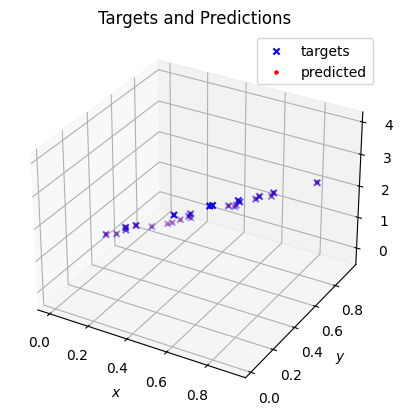

In [11]:
# plot trained and predicted points
fig = plt.figure(2)
ax = plt.axes(projection = '3d')
ax.scatter(X[:,0], X[:,1], Y[:,0], color='blue', marker='x', label='targets')
ax.scatter(X[:,0], X[:,1], model(X).detach().numpy()[:,0], color='red', marker='.', label='predicted')
ax.set_title('Targets and Predictions')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.legend()
plt.show()

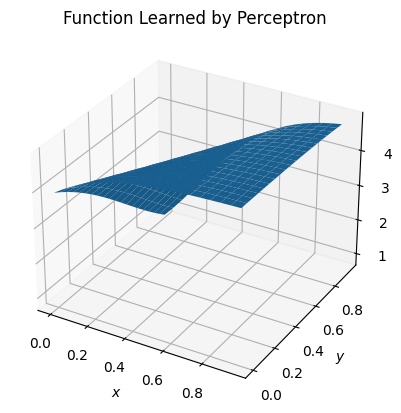

In [13]:
# plot the learned function
fig = plt.figure(3)
ax = plt.axes(projection = '3d')
X1 = np.arange(0, 1, 0.05)
X2 = np.arange(0, 1, 0.05)
X1,X2 = np.meshgrid(X1,X2)
Z = model.b.detach().numpy()+model.w.detach().numpy()[0]*X1+model.w.detach().numpy()[1]*X2+X1+model.w.detach().numpy()[2]*X1*X2
Z = 6/(1+np.exp(-Z))-1.0
regression_plane = ax.plot_surface(X1, X2, Z)
ax.xaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.yaxis.set_major_locator(ticker.IndexLocator(base = 0.2, offset=0.0))
ax.set_title('Function Learned by Perceptron')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
plt.show()